### Case Study NoteBook
> Steps of analysis:
> 1. Data Understanding
> 2. Data Wrangling
> 3. Data Visualization and Analysis
> 4. Conclusion


`Loading Libraries and Data`

In [177]:
"""To enhance our project, we will import the following libraries:
Pandas for dataframe operations
NumPy for numerical data analysis
Seaborn for visualization
Matplotlib for plotting
Warnings to ignore unnecessary warnings"""

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.display import HTML

def ignore_warnings():
    """
    Ignore unnecessary warnings while running the script.
    """
    warnings.filterwarnings('ignore')


`SetupEnvironment for pandas and sns`

In [178]:

#Removing display limit of dataframe
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)  # Remove the limit on the max column width
pd.set_option('display.float_format', '{:.2f}'.format)  # Set precision for floating-point numbers

# Setting style for Seaborn
sns.set_palette("cubehelix", 8)  # Set the color palette
sns.set_style("whitegrid", {
    'axes.grid': False,          # Disable grid on axes
    'grid.color': '0.9',         # Set the grid color
    'grid.linestyle': '-',       # Set the grid line style
    'axes.edgecolor': '0.8',     # Set the axes edge color
    'axes.linewidth': 1,         # Set the axes line width
    'font.family': ['sans-serif'],
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'text.color': '0.3',         # Set the text color
    'xtick.color': '0.3',        # Set the x-tick color
    'ytick.color': '0.3',        # Set the y-tick color
    'xtick.direction': 'out',    # Set the x-tick direction
    'ytick.direction': 'out',    # Set the y-tick direction
    'axes.titlesize': 'large',   # Set the axes title size
    'axes.labelsize': 'medium',  # Set the axes label size
    'xtick.labelsize': 'small',  # Set the x-tick label size
    'ytick.labelsize': 'small'   # Set the y-tick label size
})


# Data Understasnding

In [179]:
# reading data from csv and data dictionary using pandas 
loan_df = pd.read_csv('loan.csv')
loandict_df = pd.read_excel('Data_Dictionary.xlsx')

C:\Users\anwes\AppData\Local\Temp\ipykernel_18612\1644696492.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan.csv')


In [180]:
#display first 5 rows for loan dataframe
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [181]:
#display first 5 rows for data dictonary dataframe

loandict_df.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [182]:
#Analyzeing the data for loan df
print("Loan Dataframe has:")
print("     -{} Number of Columns.".format(loan_df.shape[1]))
print("     -{} Number of Rows.".format(loan_df.shape[0]))
print("     -{} Number of duplicates.".format(loan_df.duplicated().sum()))
print("     -{} Number of unique_values.".format(loan_df.nunique().agg('sum')))
print("     -{} Number of missing values.".format(loan_df.isnull().sum().sum()))

Loan Dataframe has:
     -111 Number of Columns.
     -39717 Number of Rows.
     -0 Number of duplicates.
     -416800 Number of unique_values.
     -2263366 Number of missing values.


In [183]:
#Description about the dataframe with min,max and total counts etc ... 
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

In [184]:
#Information

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [185]:
#checking datatypes

loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [186]:
# checking columns

loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

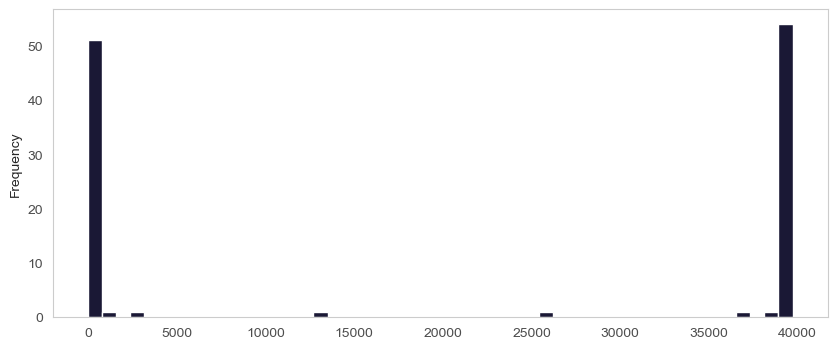

In [187]:
#Initial Data Visualization to Determine Data Distribution
plotting = loan_df.isnull().sum()
plotting.plot(kind='hist', bins=50, figsize = (10,4))
plt.show()

# Data Cleaning


In [188]:
"""In the below figure we can see there is a hugh spike at 40K,The total rows are  39,717 
hence we need to analyze the data more because it is not formatted ,need to drops null values and also need to drop few columns"""

#Lets start with the columns which is having larger percentage of null values 
missing_percentage = loan_df.isnull().sum() / len(loan_df) * 100
missing_percentage[missing_percentage > 40]

mths_since_last_delinq            64.66
mths_since_last_record            92.99
next_pymnt_d                      97.13
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00
open_rv_24m                      100.00
max_bal_bc                       100.00
all_util                         100.00
total_rev_hi_lim                 100.00
inq_fi                           100.00
total_cu_tl                      100.00
inq_last_12m                     100.00
acc_open_past_24mths             100.00


# Handling Nulls

>Need to remove the columns which is having more then 40% of missing values for better analysis and also to increse accuracy


In [189]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.shape
# The number of columns are reduced to 57 from 111 

(39717, 57)

In [190]:
#rechecking 
missing_percentage = loan_df.isnull().sum() / len(loan_df) * 100
greaterThan40Percentage=missing_percentage[missing_percentage > 40]

In [191]:
#in the abovbe still 3 columns are having missing value greate than 40% lets remove them
loan_df = loan_df.loc[:,loan_df.isnull().sum()/loan_df.shape[0]*100<40]
(loan_df.isnull().sum() / len(loan_df) * 100).sort_values(ascending=False)

desc                         32.59
emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
total_rec_prncp               0.00
out_prncp                     0.00
initial_list_status           0.00
out_prncp_inv                 0.00
total_acc                     0.00
total_pymnt                   0.00
total_pymnt_inv               0.00
collection_recovery_fee       0.00
total_rec_int                 0.00
total_rec_late_fee            0.00
recoveries                    0.00
pub_rec                       0.00
last_pymnt_amnt               0.00
policy_code                   0.00
application_type              0.00
acc_now_delinq                0.00
delinq_amnt                   0.00
revol_bal           

In [192]:
loan_df.shape

(39717, 54)

In [193]:
#Now need to analyze the data for the 54 columns and need to remove the unnecessary columns which doesnot require for analysis
print(loan_df.columns)
#Writing the dataframe to analyze furter irrelevent column
loan_df.to_csv('dataanalysis_v1.csv', index=False)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


# Dropping unnucessary columns

>Dropping unnecessary columns which is having  irrelevant information for data analysis

In [194]:
## The removed columns represent customer behavior variables, which are calculated after the fact. Therefore, they cannot be utilized as input for the analysis
customer_behavior_columns_drop = ['recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'delinq_2yrs', 'revol_bal', 
                   'out_prncp', 'out_prncp_inv', 'total_pymnt', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 
                   'pub_rec', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'revol_util', 
                   'total_acc', 'last_credit_pull_d', 'application_type']
loan_df = loan_df.drop(customer_behavior_columns_drop, axis=1)


In [195]:
""", "member_id", "url", "title", "emp_title", "zip_code", "addr_state" 
the above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them"""

loan_df=loan_df.drop(['title','emp_title','desc','url','member_id','addr_state'],axis=1)

In [196]:
# Removing zip_code because cannot be used as input for the analysis
loan_df=loan_df.drop(['zip_code'],axis=1)

In [197]:
# Remove the specified column from the DataFrame
loan_df=loan_df.drop(['funded_amnt_inv'],axis=1)

# Dropping cols having more unique values 

In [198]:
loan_df.shape
# it is observed that few columns have unique values hence it doesnot seems to impact out analysis further hence removing those columns 
"""Here for example tax_liens contains only 0 hence it doesnot impact on our analysis"""
print(loan_df.nunique().sort_values(ascending=True))


tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


In [199]:
loan_df = loan_df.loc[:,loan_df.nunique()>1]
loan_df.shape

(39717, 17)

In [200]:
# Checking for missing values across the rows
print((loan_df.isnull().sum(axis=1)).max())


1


# Removing duplicates

In [201]:
loan_df = loan_df.drop_duplicates()

In [202]:
loan_df.shape

(39717, 17)

# fixing the null values

In [203]:
# Checking for missing values across the dataframe
print(loan_df.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
loan_amnt                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
id                         0
dtype: int64


emp_length	1075
pub_rec_bankruptcies	697 need to focous on the above cols 

In [204]:
# Checking values in emp_length 
print(loan_df.emp_length.value_counts())
print("*"*100)
print(loan_df.pub_rec_bankruptcies.value_counts())

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64
****************************************************************************************************
pub_rec_bankruptcies
0.00    37339
1.00     1674
2.00        7
Name: count, dtype: int64


> "pub_rec_bankruptcies"  value 0 which can be subsitued in place of null 

> "emp_length" the fixing null values difficult hence removing it will be a good solution


In [205]:
loan_df = loan_df.dropna(subset=['emp_length'])
loan_df.pub_rec_bankruptcies.fillna(0,inplace=True)
loan_df.shape

(38642, 17)

In [206]:
# Checking for missing values across the dataframe
print(loan_df.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


# DataType Check

In [207]:
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  dti                   38

In [208]:
# Correcting data type and format for columns in the dataframe
## Deriving more columns with the conversion of data type
# Convert 'int_rate' to float with rounding to 2 decimal places
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(str(x).replace('%',''))).round(2)

# Convert 'grade' and 'sub_grade' to categorical
loan_df['grade'] = loan_df['grade'].astype('category')
loan_df['sub_grade'] = loan_df['sub_grade'].astype('category')

# Convert 'issue_d' to datetime format
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

# Convert 'purpose'  to categorical
loan_df['purpose'] = loan_df['purpose'].astype('category')


# Convert 'emp_length' to float
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)

# Convert 'home_ownership' and 'verification_status' to categorical
loan_df['home_ownership'] = loan_df['home_ownership'].astype('category')
loan_df['verification_status'] = loan_df['verification_status'].astype('category')

# Convert 'term' to integer
loan_df['term'] = loan_df['term'].apply(lambda x: int(x.replace(' months','')))

In [209]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38642 non-null  int64         
 1   loan_amnt             38642 non-null  int64         
 2   funded_amnt           38642 non-null  int64         
 3   term                  38642 non-null  int64         
 4   int_rate              38642 non-null  float64       
 5   installment           38642 non-null  float64       
 6   grade                 38642 non-null  category      
 7   sub_grade             38642 non-null  category      
 8   emp_length            38642 non-null  float64       
 9   home_ownership        38642 non-null  category      
 10  annual_inc            38642 non-null  float64       
 11  verification_status   38642 non-null  category      
 12  issue_d               38642 non-null  datetime64[ns]
 13  loan_status          

In [210]:
loan_df.head()
#Now data seems to be formatted need to check the date columns

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,1077501,5000,5000,36,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,27.65,0.00
1,1077430,2500,2500,60,15.27,59.83,C,C4,0.50,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,1.00,0.00
2,1077175,2400,2400,36,15.96,84.33,C,C5,10.00,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0.00
3,1076863,10000,10000,36,13.49,339.31,C,C1,10.00,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,20.00,0.00
4,1075358,3000,3000,60,12.69,67.79,B,B5,1.00,RENT,80000.00,Source Verified,2011-12-01,Current,other,17.94,0.00


# Operation with Date cols


In [211]:
# Extract 'issue_year' and 'issue_month' from 'issue_d'
loan_df['issue_year'] = loan_df['issue_d'].dt.year
loan_df['issue_month'] = loan_df['issue_d'].dt.month
print(loan_df['issue_year'].value_counts())
#Highest loan taken in 2011
loan_df.head()

issue_year
2011    20899
2010    11214
2009     4716
2008     1562
2007      251
Name: count, dtype: int64


,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,36,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,27.65,0.00,2011,12
1,1077430,2500,2500,60,15.27,59.83,C,C4,0.50,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,1.00,0.00,2011,12
2,1077175,2400,2400,36,15.96,84.33,C,C5,10.00,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0.00,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,C1,10.00,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,20.00,0.00,2011,12
4,1075358,3000,3000,60,12.69,67.79,B,B5,1.00,RENT,80000.00,Source Verified,2011-12-01,Current,other,17.94,0.00,2011,12


>As the data has been cleaned, fixed and filtered as per requirement, we can select columns required for analysis and move ahead with the analysis.


In [212]:
# here facts cols and dim cols need to segregrated
fact_data = loan_df.select_dtypes(include='number')
dim_data = loan_df.select_dtypes(exclude='number')

facts Data

In [213]:
fact_data.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,36,10.65,162.87,10.00,24000.00,27.65,0.00,2011,12
1,1077430,2500,2500,60,15.27,59.83,0.50,30000.00,1.00,0.00,2011,12
2,1077175,2400,2400,36,15.96,84.33,10.00,12252.00,8.72,0.00,2011,12
3,1076863,10000,10000,36,13.49,339.31,10.00,49200.00,20.00,0.00,2011,12
4,1075358,3000,3000,60,12.69,67.79,1.00,80000.00,17.94,0.00,2011,12


Dimension Data

In [214]:
dim_data.head()

,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose
0,B,B2,RENT,Verified,2011-12-01,Fully Paid,credit_card
1,C,C4,RENT,Source Verified,2011-12-01,Charged Off,car
2,C,C5,RENT,Not Verified,2011-12-01,Fully Paid,small_business
3,C,C1,RENT,Source Verified,2011-12-01,Fully Paid,other
4,B,B5,RENT,Source Verified,2011-12-01,Current,other


# We have cleaned data set and have parameters for our EDA. Hence proceeding  with EDA

Univariate Analysis

Let us start by understanding the correlation between the different numeric fields and see if they are related (high correlation values)

In [215]:
distinct_loan_status = loan_df['loan_status'].unique()
print(distinct_loan_status)
loan_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan_df['loan_status_num'] = loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

['Fully Paid' 'Charged Off' 'Current']


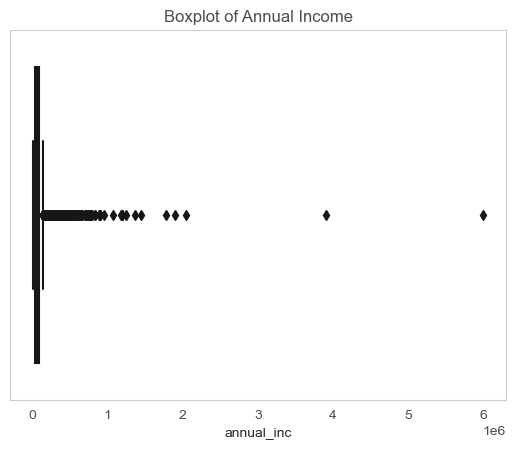

In [216]:
# Assuming loan_df is a Pandas DataFrame
sns.boxplot(x=loan_df['annual_inc'])

# Add a title to the plot
plt.title('Boxplot of Annual Income')

# Show the plot
plt.show()

# Univariate Analysis
# Plot histograms for numerical features


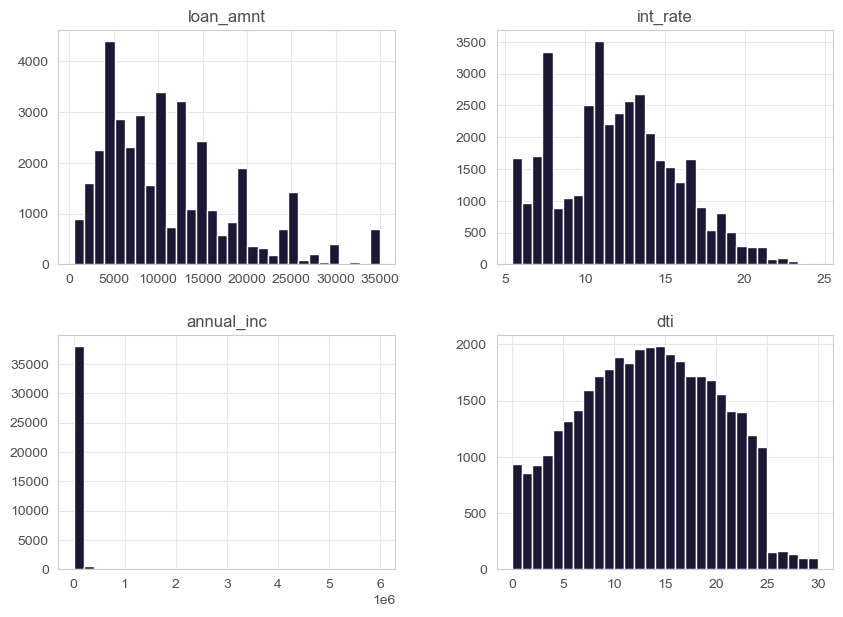

In [236]:
numerical_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
loan_df[numerical_features].hist(bins=30, figsize=(10, 7))
plt.show()

# Catagorical - EDA

Here we have used Barplot,Boxplot,violinplot for catagorical data analysis phase 1

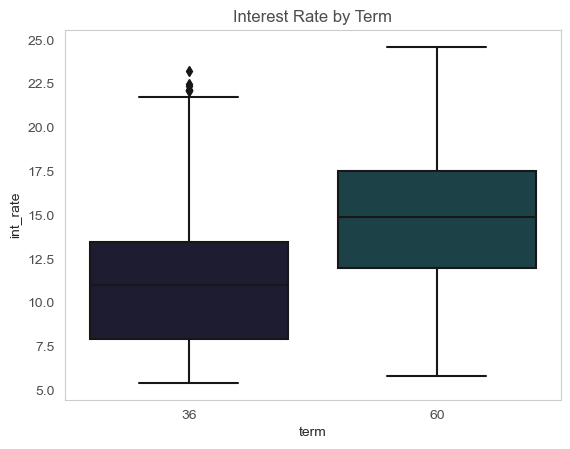

In [246]:
# Plot bar charts for categorical features
sns.boxplot(x='term', y='int_rate', data=loan_df)
plt.title('Interest Rate by Term')
plt.show()

2.Barplot

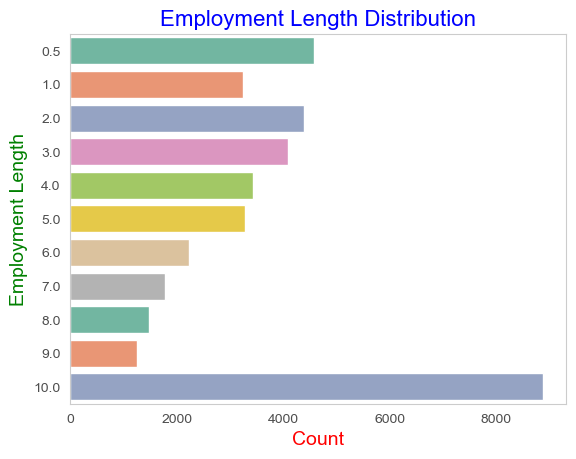

In [253]:
# Countplot with custom colors
sns.countplot(y='emp_length', data=loan_df, palette='Set2')  # Change 'Set2' - specific colors
plt.title('Employment Length Distribution', color='blue', fontsize=16)  # Change title color and font size
plt.ylabel('Employment Length', color='green', fontsize=14)  # Change y-axis label color and font size
plt.xlabel('Count', color='red', fontsize=14)  # Change x-axis label color and font size

plt.show()

c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


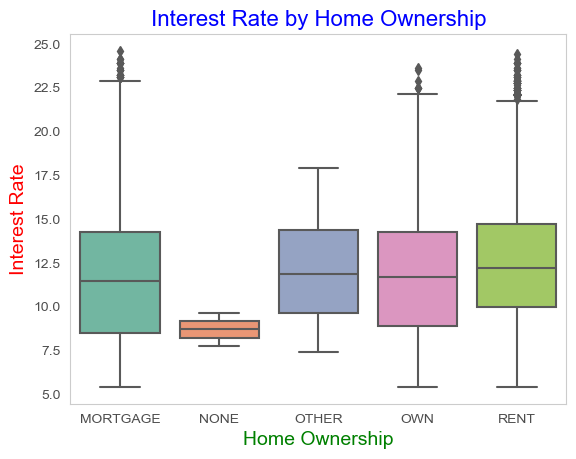

In [254]:
# Customize box plot colors using palette
sns.boxplot(x='home_ownership', y='int_rate', data=loan_df, palette='Set2') 

# Labels Custimazation
plt.title('Interest Rate by Home Ownership', color='blue', fontsize=16)  # Change title color and font size
plt.xlabel('Home Ownership', color='green', fontsize=14)  # Change x-axis label color and font size
plt.ylabel('Interest Rate', color='red', fontsize=14)  # Change y-axis label color and font size

plt.show()

c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


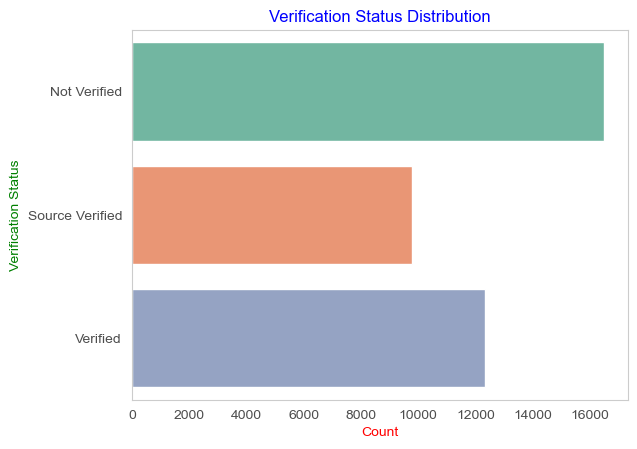

In [252]:
sns.countplot(y='verification_status', data=loan_df, palette='Set2')  # Change 'Set2' to any desired palette or specific color

# Customize the title and y-axis label color
plt.title('Verification Status Distribution', color='blue')  # Change title color
plt.ylabel('Verification Status', color='green')  # Change y-axis label color
plt.xlabel('Count', color='red')  # Change x-axis label color

plt.show()


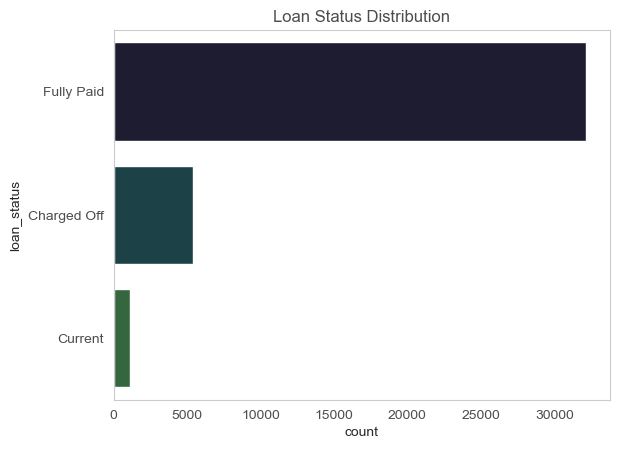

In [232]:
sns.countplot(y='loan_status', data=loan_df)
plt.title('Loan Status Distribution')
plt.show()


c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


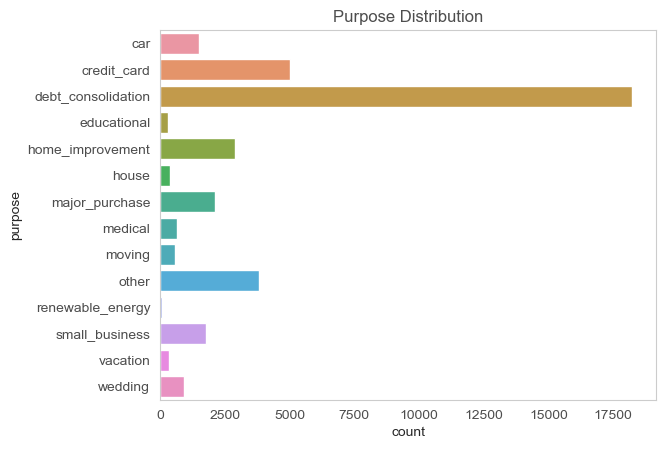

In [249]:
sns.countplot(y='purpose', data=loan_df)
plt.title('Purpose Distribution')
plt.show()

c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


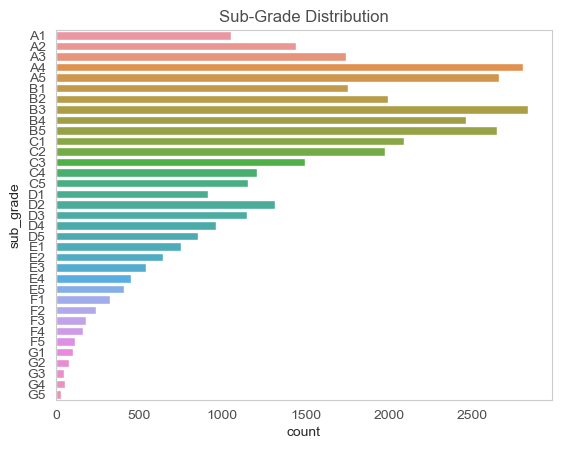

In [235]:
sns.countplot(y='sub_grade', data=loan_df)
plt.title('Sub-Grade Distribution')
plt.show()

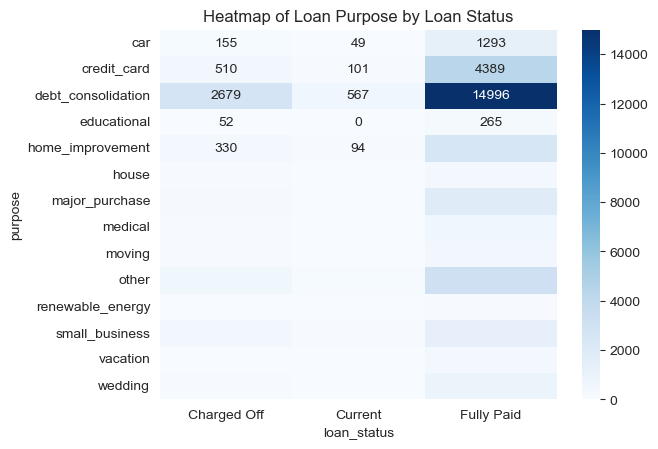

In [171]:
ct = pd.crosstab(loan_df['purpose'], loan_df['loan_status'])
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Loan Purpose by Loan Status')
plt.show()


c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


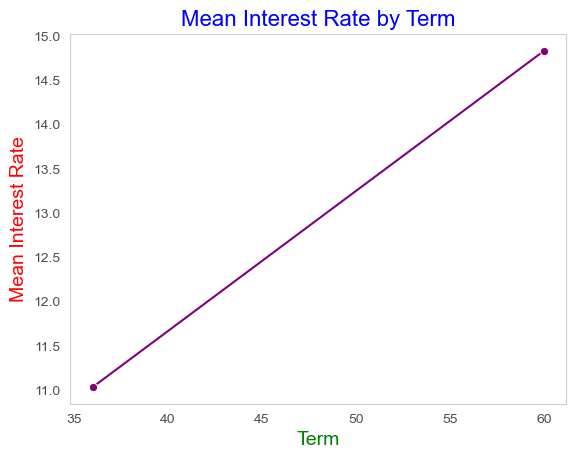

In [255]:
# Aggregate the data to get mean interest rate for each loan term
mean_int_rate = loan_df.groupby('term')['int_rate'].mean().reset_index()

# Create a line plot
sns.lineplot(x='term', y='int_rate', data=mean_int_rate, marker='o', color='purple')

# Customize the title and axis label colors
plt.title('Mean Interest Rate by Term', color='blue', fontsize=16)  # Change title color and font size
plt.xlabel('Term', color='green', fontsize=14)  # Change x-axis label color and font size
plt.ylabel('Mean Interest Rate', color='red', fontsize=14)  # Change y-axis label color and font size

plt.show()


c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

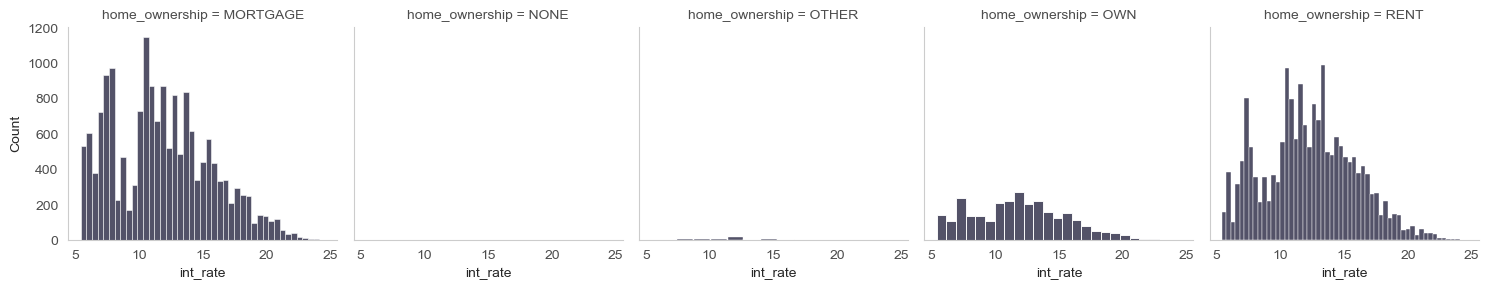

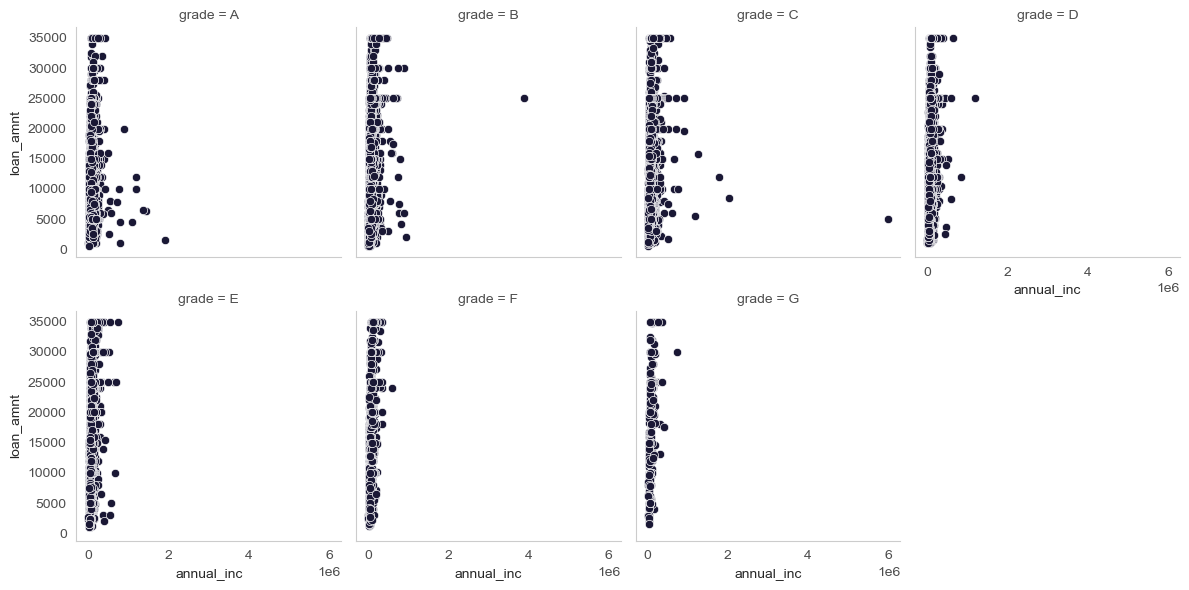

In [220]:
g = sns.FacetGrid(loan_df, col='home_ownership')
g.map(sns.histplot, 'int_rate')
plt.show()

g = sns.FacetGrid(loan_df, col='grade', col_wrap=4)
g.map(sns.scatterplot, 'annual_inc', 'loan_amnt')
plt.show()

c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


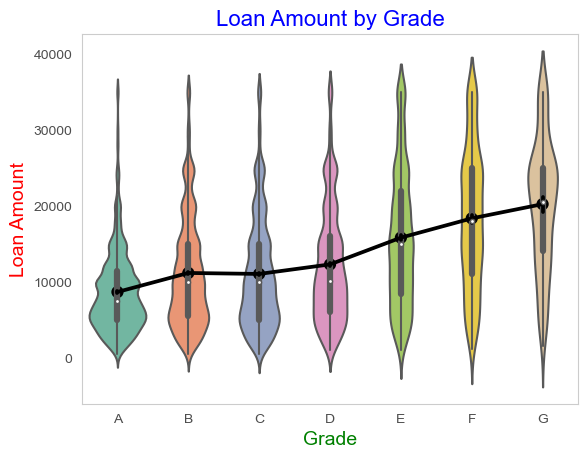

In [270]:
# Create the violin plot
sns.violinplot(x='grade', y='loan_amnt', data=loan_df, palette='Set2')
sns.pointplot(x='grade', y='loan_amnt', data=loan_df, estimator='mean', color='black', markers='o')
plt.title('Loan Amount by Grade', color='blue', fontsize=16)
plt.xlabel('Grade', color='green', fontsize=14)
plt.ylabel('Loan Amount', color='red', fontsize=14)

plt.show()

c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

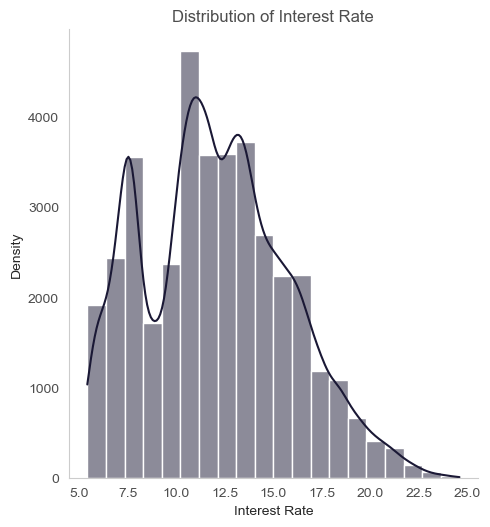

In [271]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.displot(sorted(loan_df.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

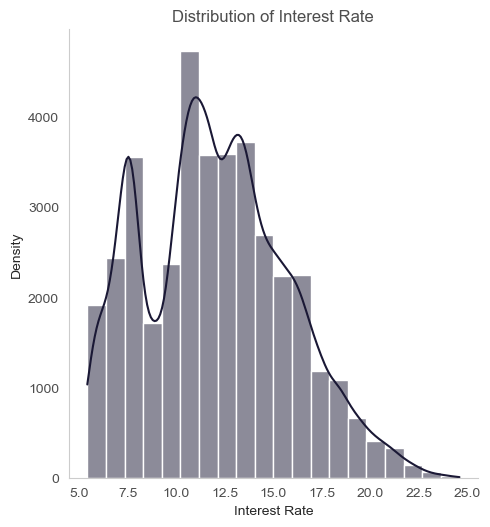

In [272]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.displot(sorted(loan_df.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

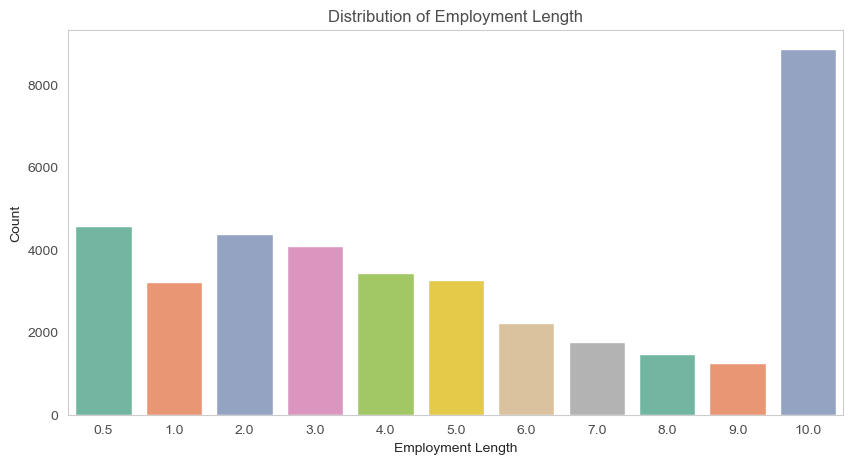

In [275]:
# Calculate counts for each employment length
emp_length_counts = loan_df['emp_length'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=emp_length_counts.index, y=emp_length_counts.values, palette='Set2')

plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length', fontsize=12)

plt.show()


In [282]:
# Distribution of home_ownership
plt.figure(figsize=(10,5))
sns.countplot(loan_df.home_ownership)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()


ValueError: could not convert string to float: 'RENT'

<Figure size 1000x500 with 0 Axes>

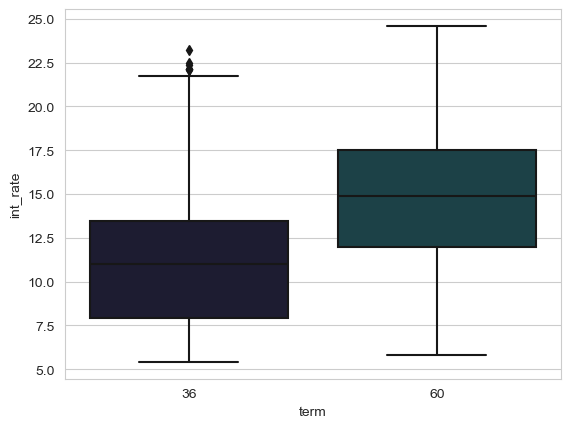

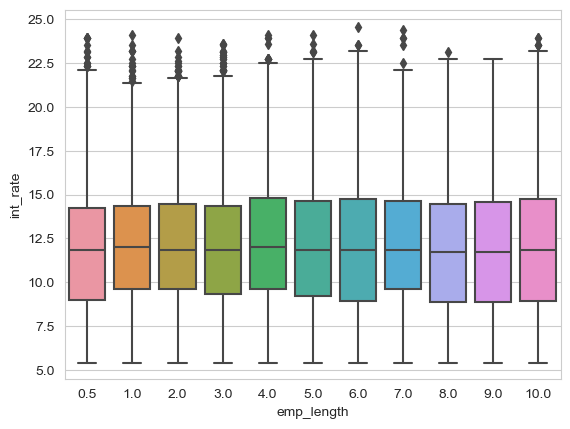

c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


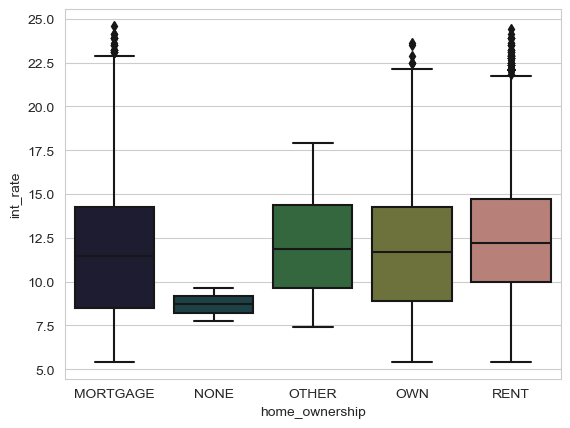

c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


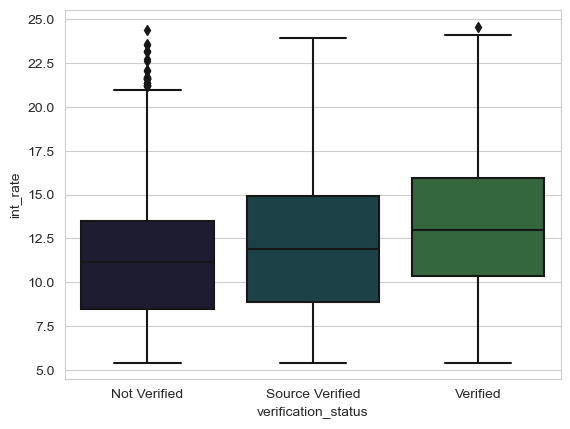

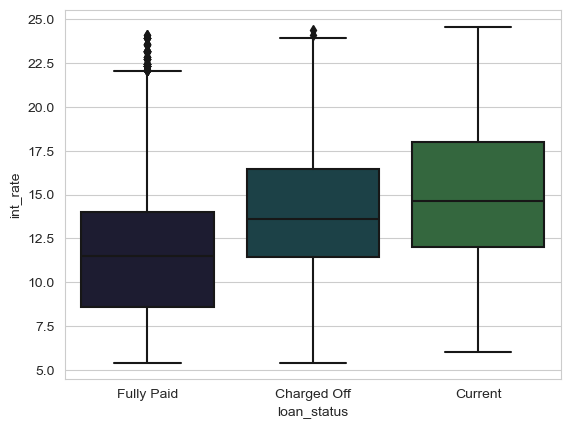

c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


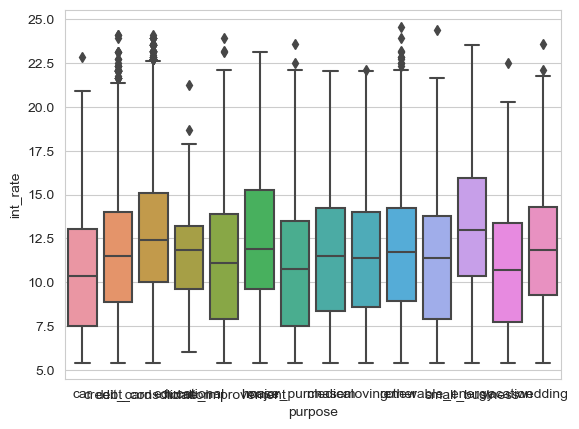

c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


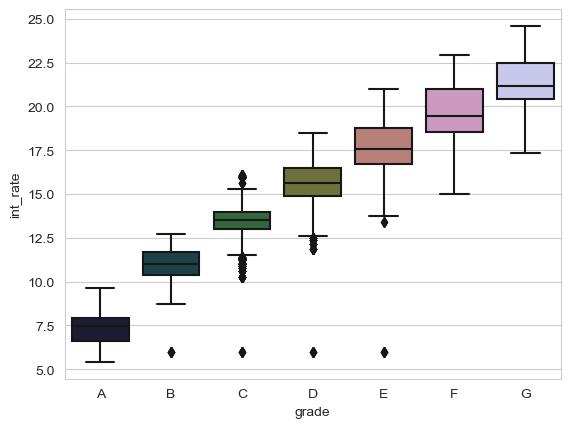

c:\Users\anwes\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


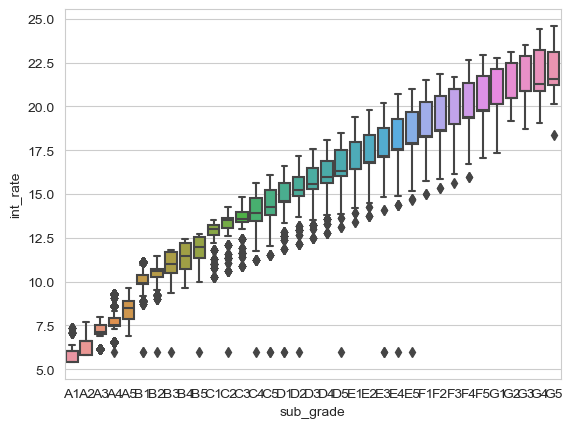

In [162]:
# Box plots for numerical vs. categorical
for feature in categorical_features:
    sns.boxplot(x=feature, y='int_rate', data=loan_df)
    plt.show()

In [156]:
# Heatmap for correlation matrix
sns.heatmap(loan_df.corr(), annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'B'